In [1]:
import teacher_model as tm
import quantum_computer as qc
import quantum_trainer as qt
import numpy as np
import matplotlib.pyplot as plt

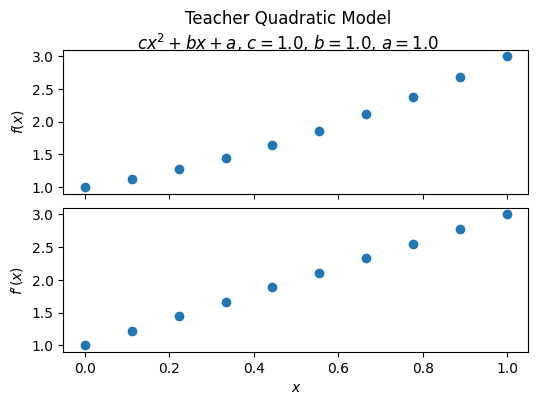

In [2]:
# Define my teacher model
my_teacher_model = tm.TeacherModel()
my_teacher_model.config(select_model="quad")
my_teacher_model.plot_model()

In [3]:
# Define quatnum_computer

# Data Encoding
my_quantum_encoding = qc.QuantumEncoding()
my_quantum_encoding.config(select_encoding="RY_arcsin")

# Entangling block
my_entangling = qc.HamlitonianMixerBlock()

# Single qubit rotation block
my_parameterised = qc.SingleQubitRotationBlock()

# Quantum Measurement
my_measurement = qc.QuantumMeasurement()
my_measurement.config(select_measurement = "first_qubit_Z")

# Package all components into a quantum computer
my_quantum_computer = qc.QuantumComputer()
my_quantum_computer.config(select_qc_model="AB_repeat", depth=2) 
my_quantum_computer.inputs(Encode=my_quantum_encoding, A=my_entangling, B=my_parameterised, Observable=my_measurement)

In [4]:
# Define quantum trainer
my_trainer = qt.QuantumTrainer()
my_trainer.config(select_optimiser = "GD", select_loss="quad_loss")
my_trainer.inputs(my_teacher_model, my_quantum_computer)
my_trainer.train()

1.0120143756067902e+25
-12216557424734.01


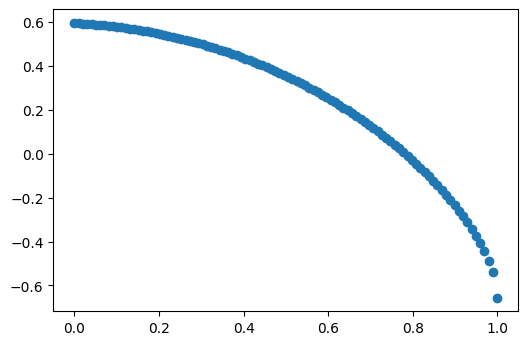

In [5]:
predict_y = []
for data_iter in range(100):
    predict_result = my_quantum_computer.run_qc(my_teacher_model.training_data["x_data"][data_iter])
    predict_y.append(predict_result["output_data"])
    
fig1, ax1 = plt.subplots(dpi=100)
ax1.scatter(my_teacher_model.training_data["x_data"], np.asarray(predict_y))

In [6]:
my_teacher_model.training_data["x_data"]



array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [7]:
np.asarray(predict_y)

array([ 0.59642459,  0.59533878,  0.59411111,  0.59274101,  0.59122783,
        0.58957095,  0.58776971,  0.58582343,  0.58373143,  0.58149298,
        0.57910735,  0.57657378,  0.5738915 ,  0.57105972,  0.5680776 ,
        0.56494431,  0.56165897,  0.55822069,  0.55462855,  0.55088161,
        0.54697888,  0.54291938,  0.53870206,  0.53432586,  0.52978969,
        0.52509241,  0.52023287,  0.51520987,  0.51002216,  0.50466848,
        0.49914749,  0.49345785,  0.48759815,  0.48156692,  0.47536268,
        0.46898387,  0.46242887,  0.45569603,  0.44878361,  0.44168984,
        0.43441284,  0.4269507 ,  0.41930141,  0.4114629 ,  0.40343299,
        0.39520945,  0.38678992,  0.37817196,  0.36935302,  0.36033043,
        0.35110141,  0.34166304,  0.33201228,  0.32214592,  0.31206061,
        0.30175282,  0.29121884,  0.28045476,  0.26945646,  0.25821959,
        0.24673955,  0.23501145,  0.22303014,  0.21079011,  0.19828551,
        0.1855101 ,  0.17245722,  0.15911972,  0.14548995,  0.13